In [1]:
from utils import *

In [2]:
# replace with a configuration file
work_dir = '/Users/robinhood/Dropbox (HMS)/Data/imaging/processing_test'
filename = 'sfmbt_20210926_5.czi'
channel_dict = {'DAPI': 0, 'TL':1, 'gt':2, 'pho':3, 'hb':4}
bkgd_signal = 200
channel_list = ['DAPI', 'gt', 'pho', 'hb'] #keep for iteration
shape_channel = 'DAPI'
ap_channel = 'DAPI'


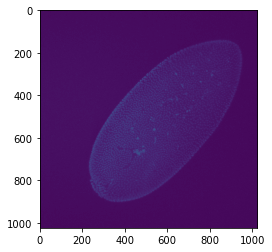

In [3]:
path = os.path.join(work_dir, filename)
czi = czifile.imread(path)
img=czi.squeeze()
data = {}
for channel in channel_list:
    data[channel] = img[channel_dict[channel],...]
    
xdim = img.shape[2]
ydim = img.shape[3]
z_plane = img.shape[1]/2
z_plane = round(z_plane)

max_AP = data[ap_channel].max(0) # this will be how to pick AP axis
# zshape = data[shape_channel][z_plane,:,:]
zshape = data[shape_channel].max(0)
threshed = []
#zshape = exposure.adjust_gamma(zshape)
plt.imshow(zshape)


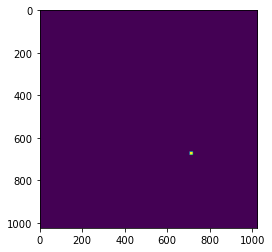

In [4]:
threshed.append(get_thresholded(data, 'OHTSU'))
plt.imshow(threshed[-1])

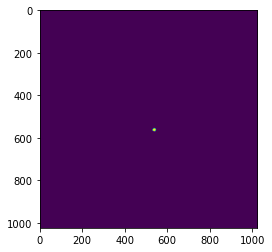

In [5]:
threshed.append(get_thresholded(data, 'GAMMA'))
plt.imshow(threshed[-1])

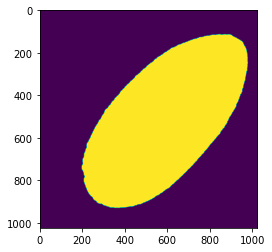

In [6]:
threshed.append(get_thresholded(data, 'dill'))
plt.imshow(threshed[-1])

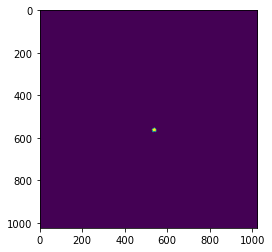

In [7]:
threshed.append(get_thresholded(data, 'gamma_v2'))
plt.imshow(threshed[-1])

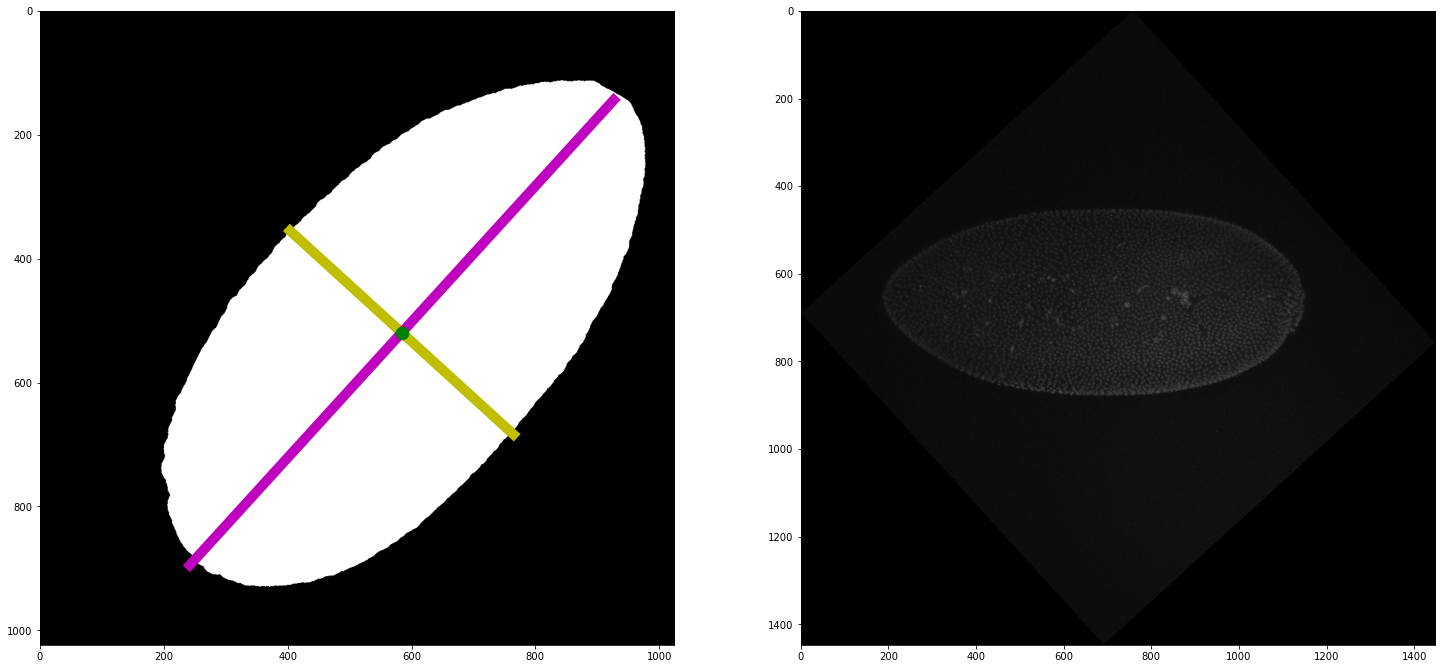

In [11]:
zshape, rotation_axis, rotated_AP, xs, ys = get_orientation(data, method='dill')
fig = show_orientation(zshape, rotated_AP, xs, ys)

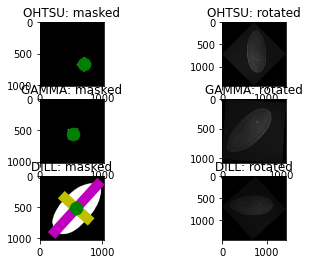

In [4]:
fig = show_thresh_test(data)